In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df1 = pd.read_csv("annex1.csv")
sales_df2 = pd.read_csv("annex2.csv")
sales_df3 = pd.read_csv("annex3.csv")
sales_df4 = pd.read_csv("annex4.csv")

In [3]:
display(sales_df1)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
...,...,...,...,...
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom


In [4]:
display(sales_df2)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No


In [5]:
sales_df3 = sales_df3.sort_values(["Date"], ascending=[True])
sales_df3 = sales_df3.drop_duplicates(subset='Item Code', keep='first')
display(sales_df3)
print(sales_df3['Item Code'].duplicated().sum())

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
20,2020-07-01,102900005117209,7.58
21,2020-07-01,102900005118817,8.47
22,2020-07-01,102900005118824,5.65
23,2020-07-01,102900005118831,4.13
...,...,...,...
49699,2023-02-15,102900011032480,25.96
50369,2023-02-28,102900011036242,2.72
50710,2023-03-07,102900011035849,4.17
53661,2023-05-13,106972776821582,3.23


0


In [6]:
display(sales_df4)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom (Bag) (3),1.30
247,106971563780002,Xianzongye (Bag) (2),0.00
248,106972776821582,Xianzongye (Bag) (3),9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),11.13


In [7]:
sales_df2[sales_df2["Sale or Return"] == "return"][["Sale or Return", "Quantity Sold (kilo)"]]

,Sale or Return,Quantity Sold (kilo)
357,return,-0.436
2929,return,-1.000
6991,return,-1.000
7090,return,-1.000
7242,return,-1.000
...,...,...
838814,return,-0.388
839044,return,-0.402
847886,return,-0.335
857756,return,-1.000


In [8]:
sales_df = sales_df2.merge(sales_df1, on = "Item Code", how = "left")
sales_df = sales_df.merge(sales_df3, on = "Item Code", how = "left")
sales_df = sales_df.merge(sales_df4, on = "Item Code", how = "left")
display(sales_df)

,Date_x,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name_x,Category Code,Category Name,Date_y,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,2020-07-01,4.32,Paopaojiao (Jingpin),7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2020-07-01,2.10,Chinese Cabbage,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,2020-07-01,4.32,Paopaojiao (Jingpin),7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,2020-07-01,7.03,Shanghaiqing,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,2020-07-01,4.60,Caixin,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom,2020-09-18,14.00,Xixia Black Mushroom (1),10.80
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,Changxianqie,1011010501,Solanum,2021-01-30,10.32,Changxianqie,6.90
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom,2020-09-18,14.00,Xixia Black Mushroom (1),10.80
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,Wuhu Green Pepper (1),1011010504,Capsicum,2020-09-12,6.64,Wuhu Green Pepper (1),5.70


In [9]:
sales_df = sales_df[["Date_x", "Time", "Item Code", "Quantity Sold (kilo)", "Unit Selling Price (RMB/kg)", "Sale or Return", "Discount (Yes/No)", "Item Name_x", "Category Code", "Category Name", "Date_y", "Wholesale Price (RMB/kg)", "Item Name_y", "Loss Rate (%)"]]
display(sales_df)

,Date_x,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name_x,Category Code,Category Name,Date_y,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,2020-07-01,4.32,Paopaojiao (Jingpin),7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,2020-07-01,2.10,Chinese Cabbage,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,Paopaojiao (Jingpin),1011010504,Capsicum,2020-07-01,4.32,Paopaojiao (Jingpin),7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,Shanghaiqing,1011010101,Flower/Leaf Vegetables,2020-07-01,7.03,Shanghaiqing,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,Caixin,1011010101,Flower/Leaf Vegetables,2020-07-01,4.60,Caixin,13.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom,2020-09-18,14.00,Xixia Black Mushroom (1),10.80
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,Changxianqie,1011010501,Solanum,2021-01-30,10.32,Changxianqie,6.90
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,Xixia Black Mushroom (1),1011010801,Edible Mushroom,2020-09-18,14.00,Xixia Black Mushroom (1),10.80
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,Wuhu Green Pepper (1),1011010504,Capsicum,2020-09-12,6.64,Wuhu Green Pepper (1),5.70


In [10]:
sales_df.drop(["Item Code", "Category Code", "Date_y", "Item Name_y"], axis=1, inplace=True)
display(sales_df)

,Date_x,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name_x,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70
...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80
878499,2023-06-30,21:35:14.358,0.669,12.0,sale,No,Changxianqie,Solanum,10.32,6.90
878500,2023-06-30,21:35:20.264,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80
878501,2023-06-30,21:35:21.509,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,6.64,5.70


In [11]:
sales_df.rename(columns={
    "Item Name_x": "Item Name",
    "Date_x": "Date"
}, inplace=True)
display(sales_df)

,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2020-07-01,09:15:07.924,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
1,2020-07-01,09:17:27.295,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27
2,2020-07-01,09:17:33.905,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08
3,2020-07-01,09:19:45.450,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43
4,2020-07-01,09:20:23.686,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70
...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80
878499,2023-06-30,21:35:14.358,0.669,12.0,sale,No,Changxianqie,Solanum,10.32,6.90
878500,2023-06-30,21:35:20.264,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80
878501,2023-06-30,21:35:21.509,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,6.64,5.70


In [12]:
# Analysis 1 - Time-based Analysis

sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Time'] = sales_df['Time'].str.slice(0, 8)  # trims to "HH:MM:SS"
sales_df['Hour'] = pd.to_datetime(sales_df['Time'], format="%H:%M:%S").dt.hour

display(sales_df)

,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),Hour
0,2020-07-01,09:15:07,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,9
1,2020-07-01,09:17:27,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27,9
2,2020-07-01,09:17:33,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,9
3,2020-07-01,09:19:45,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43,9
4,2020-07-01,09:20:23,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70,9
...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80,21
878499,2023-06-30,21:35:14,0.669,12.0,sale,No,Changxianqie,Solanum,10.32,6.90,21
878500,2023-06-30,21:35:20,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80,21
878501,2023-06-30,21:35:21,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,6.64,5.70,21


<Axes: xlabel='Hour'>

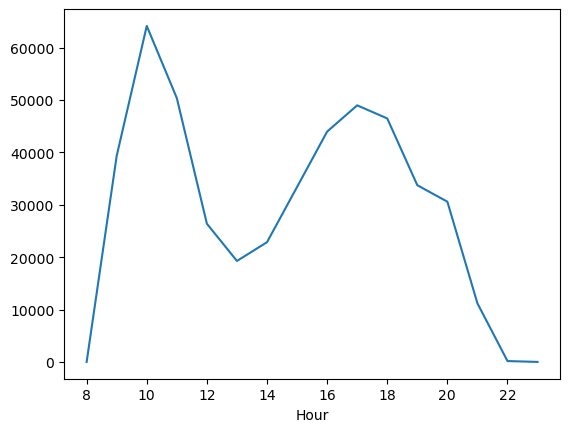

In [13]:
#Sales trend over time (daily, weekly, monthly)?

sales_df.groupby('Hour')['Quantity Sold (kilo)'].sum().plot(kind="line")

Text(0.5, 1.0, 'Quantity Sold by Hour and Day')

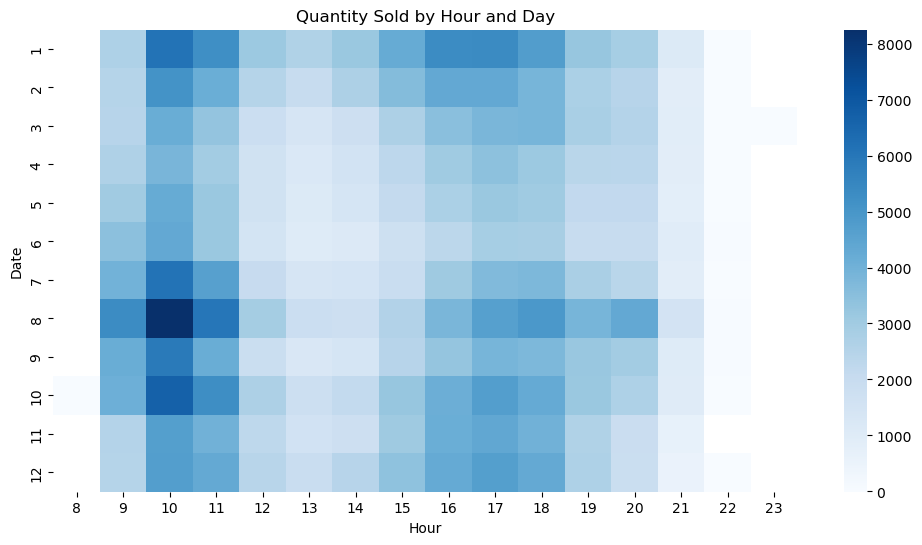

In [14]:
# Is there seasonality?

pivot = sales_df.pivot_table(
    index=sales_df['Date'].dt.month,
    columns='Hour',
    values='Quantity Sold (kilo)',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='Blues')
plt.title('Quantity Sold by Hour and Day')

<Axes: xlabel='Hour'>

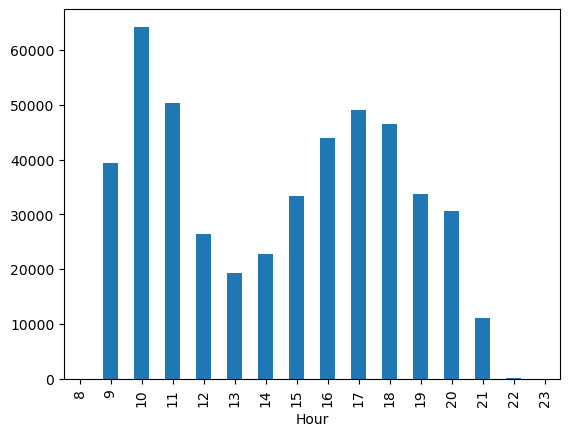

In [15]:
# What are the peak sales hours?

sales_df.groupby('Hour')['Quantity Sold (kilo)'].sum().plot(kind='bar')

In [16]:
# Analysis 2
sales_df['Revenue'] = sales_df['Quantity Sold (kilo)'] * sales_df['Unit Selling Price (RMB/kg)']
sales_df['Cost'] = sales_df['Quantity Sold (kilo)'] * sales_df['Wholesale Price (RMB/kg)']
sales_df['Profit'] = sales_df['Revenue'] - sales_df['Cost']
sales_df['Margin %'] = sales_df['Profit'] / sales_df['Revenue'] * 100

display(sales_df)

,Date,Time,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Category Name,Wholesale Price (RMB/kg),Loss Rate (%),Hour,Revenue,Cost,Profit,Margin %
0,2020-07-01,09:15:07,0.396,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,9,3.0096,1.71072,1.29888,43.157895
1,2020-07-01,09:17:27,0.849,3.2,sale,No,Chinese Cabbage,Flower/Leaf Vegetables,2.10,22.27,9,2.7168,1.78290,0.93390,34.375000
2,2020-07-01,09:17:33,0.409,7.6,sale,No,Paopaojiao (Jingpin),Capsicum,4.32,7.08,9,3.1084,1.76688,1.34152,43.157895
3,2020-07-01,09:19:45,0.421,10.0,sale,No,Shanghaiqing,Flower/Leaf Vegetables,7.03,14.43,9,4.2100,2.95963,1.25037,29.700000
4,2020-07-01,09:20:23,0.539,8.0,sale,No,Caixin,Flower/Leaf Vegetables,4.60,13.70,9,4.3120,2.47940,1.83260,42.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13,0.284,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80,21,6.8160,3.97600,2.84000,41.666667
878499,2023-06-30,21:35:14,0.669,12.0,sale,No,Changxianqie,Solanum,10.32,6.90,21,8.0280,6.90408,1.12392,14.000000
878500,2023-06-30,21:35:20,0.125,24.0,sale,No,Xixia Black Mushroom (1),Edible Mushroom,14.00,10.80,21,3.0000,1.75000,1.25000,41.666667
878501,2023-06-30,21:35:21,0.252,5.2,sale,No,Wuhu Green Pepper (1),Capsicum,6.64,5.70,21,1.3104,1.67328,-0.36288,-27.692308


In [17]:
# Which items have the highest/lowest revenue and profit?
revenue_sales = sales_df.groupby("Item Name")["Revenue"].sum()
revenue_top = sales_df.groupby('Item Name')['Revenue'].sum().sort_values(ascending=False).head(5)
display(revenue_top)

print("")
print("----------------------------------")
print("")

revenue_bottom = sales_df.groupby('Item Name')['Revenue'].sum().sort_values(ascending=True).head(5)
display(revenue_bottom)

Item Name
Broccoli                 269880.9572
Net Lotus Root (1)       211652.1013
Xixia Mushroom (1)       211198.3864
Wuhu Green Pepper (1)    205113.6991
Yunnan Shengcai          129756.9615
Name: Revenue, dtype: float64


----------------------------------



Item Name
Needle Mushroom (Bag)     3.5000
White Jelly Mushroom      4.9000
Red Oak Leaf              8.2962
Purple Cabbage (2)        9.0240
Fruit Pepper (Orange)    10.7070
Name: Revenue, dtype: float64

In [18]:
# What is the average profit margin per item or category?
margin = sales_df.groupby("Category Name")["Margin %"].mean()
margin_top = sales_df.groupby("Category Name")["Margin %"].mean().sort_values(ascending=False).head(3)
display(margin_top)

print("")
print("----------------------------------")
print("")

margin_bottom = sales_df.groupby("Category Name")["Margin %"].mean().sort_values(ascending=True).head(3)
display(margin_bottom)

Category Name
Edible Mushroom    34.019893
Capsicum           20.745926
Solanum            19.882520
Name: Margin %, dtype: float64


----------------------------------



Category Name
Aquatic Tuberous Vegetables    -5.993112
Cabbage                         5.856403
Flower/Leaf Vegetables         15.114919
Name: Margin %, dtype: float64

In [19]:
# How does discounting impact sales?

discount_sales_count = sales_df[sales_df['Discount (Yes/No)'] == 'Yes'].shape[0]
print(f"Number of sales with discount: {discount_sales_count}")

total_sales = sales_df.shape[0]
percent_discount = (discount_sales_count / total_sales) * 100
print(f"Percentage of sales with discount: {percent_discount:.2f}%")

Number of sales with discount: 47366
Percentage of sales with discount: 5.39%
